In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import IPython as ip

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(8.0, 5.5))
mpl.rc('font', family='Noto Sans CJK TC')
ip.display.set_matplotlib_formats('svg')

In [3]:
from pathlib import Path

# path: the path relative to desktop
def plt_savefig(path):

    return plt.savefig(
        (Path('~/Desktop') / path).expanduser(),
        bbox_inches='tight',  # or the labels will be cut
        dpi=600
    )

In [4]:
df_fair = sm.datasets.fair.load_pandas().data

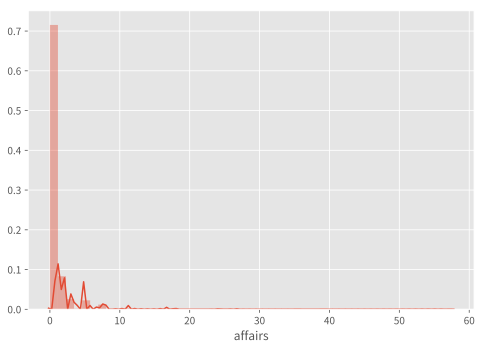

In [5]:
sns.distplot(df_fair.affairs)

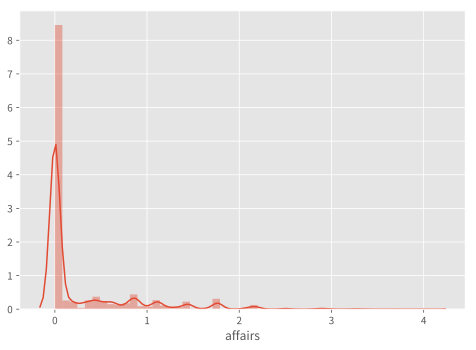

In [6]:
sns.distplot(np.log(df_fair.affairs+1))

In [7]:
# dir(smf)

In [8]:
df = df_fair
smf.ols('affairs ~ C(rate_marriage)', df).fit().llf

-13946.413163453226

In [9]:
df = df_fair
smf.glm('affairs ~ C(rate_marriage)', df, family=sm.families.Binomial(sm.families.links.identity)).fit().llf

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The identity link function does not respect the domain of the Binomial family.
  DomainWarning)
/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:932: RuntimeWarning: invalid value encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:933: RuntimeWarning: invalid value encountered in log
  n * np.log(1 - mu)) * var_weights


nan

In [10]:
df = df_fair
smf.glm('affairs ~ C(rate_marriage)', df, family=sm.families.Gamma(sm.families.links.identity)).fit().llf

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The identity link function does not respect the domain of the Gamma family.
  DomainWarning)
/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:733: RuntimeWarning: divide by zero encountered in log
  ll_obs -= special.gammaln(weight_scale) + np.log(endog)


inf

In [11]:
df = df_fair
smf.glm('affairs ~ C(rate_marriage)', df, family=sm.families.InverseGaussian(sm.families.links.identity)).fit().llf

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The identity link function does not respect the domain of the InverseGaussian family.
  DomainWarning)
/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1063: RuntimeWarning: divide by zero encountered in true_divide
  return 1. / (endog * mu ** 2) * (endog - mu) ** 2
/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1095: RuntimeWarning: divide by zero encountered in true_divide
  ll_obs = -var_weights * (endog - mu) ** 2 / (scale * endog * mu ** 2)
/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:1096: RuntimeWarning: divide by zero encountered in log
  ll_obs

nan

In [12]:
df = df_fair
smf.negativebinomial('affairs ~ C(rate_marriage)', df).fit().llf

Optimization terminated successfully.
         Current function value: 1.499830
         Iterations: 1
         Function evaluations: 5
         Gradient evaluations: 5


/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


-9547.917743281172

In [13]:
df = df_fair
smf.glm('affairs ~ C(rate_marriage)', df, family=sm.families.NegativeBinomial(sm.families.links.identity)).fit().llf

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The identity link function does not respect the domain of the NegativeBinomial family.
  DomainWarning)


-6957.33792298586

In [14]:
df = df_fair
smf.poisson('affairs ~ C(rate_marriage)', df).fit().llf

Optimization terminated successfully.
         Current function value: 1.499830
         Iterations 6


-9547.920492105555

In [15]:
df = df_fair
smf.glm('affairs ~ C(rate_marriage)', df, family=sm.families.Poisson(sm.families.links.identity)).fit().llf

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  DomainWarning)


-9547.920492105553

In [16]:
df = df_fair
smf.ols('affairs ~ C(rate_marriage)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                affairs   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     58.57
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.25e-48
Time:                        16:22:12   Log-Likelihood:                -13946.
No. Observations:                6366   AIC:                         2.790e+04
Df Residuals:                    6361   BIC:                         2.794e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.2017      0.218      5.524      0.000       0.775       1.628
C(rate_marriage)[T.2.0]     0.4141      0.247      1.679      0.093      -0.069       0.897
C(rate_marriage)[T.3.0]     0.1696      0.228      0.743      0.457      -0.278       0.617
C(rate_marriage)[T.4.0]    -0.5268      0.222     -2.370      0.018      -0.963      -0.091
C(rate_marriage)[T.5.0]    -0.8535      0.222     -3.853      0.000      -1.288      -0.419
==============================================================================
Omnibus:                     9436.269   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5218576.884
Skew:                           8.915   Prob(JB):                         0.00
Kurtosis:                     142.127   Cond. No.                         21.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
df = df_fair
smf.glm('affairs ~ C(rate_marriage)', df, family=sm.families.NegativeBinomial(sm.families.links.identity)).fit().summary()

/Users/mosky/.local/share/virtualenvs/data-science-with-python-JMAT8Joy/lib/python3.7/site-packages/statsmodels/genmod/generalized_linear_model.py:302: DomainWarning: The identity link function does not respect the domain of the NegativeBinomial family.
  DomainWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                affairs   No. Observations:                 6366
Model:                            GLM   Df Residuals:                     6361
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:               identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6957.3
Date:                Wed, 01 May 2019   Deviance:                       7438.8
Time:                        16:22:12   Pearson chi2:                 2.78e+04
No. Iterations:                     3   Covariance Type:             nonrobust
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.2017      0.163      7.351      0.000       0.881       1.522
C(rate_marriage)[T.2.0]     0.4141      0.197      2.100      0.036       0.028       0.800
C(rate_marriage)[T.3.0]     0.1696      0.173      0.979      0.327      -0.170       0.509
C(rate_marriage)[T.4.0]    -0.5268      0.165     -3.193      0.001      -0.850      -0.203
C(rate_marriage)[T.5.0]    -0.8535      0.164     -5.204      0.000      -1.175      -0.532
===========================================================================================
"""

In [18]:
df = df_fair
df = df.assign(affairs_yn=(df.affairs > 0).astype(float))
res = (smf
       .logit('affairs_yn'
              '~ C(rate_marriage)'
              '+ C(rate_marriage):C(religious)', df)
       .fit())
display(res.summary())
res_1 = res
df_fair_2 = df

Optimization terminated successfully.
         Current function value: 0.565654
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             affairs_yn   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6346
Method:                           MLE   Df Model:                           19
Date:                Wed, 01 May 2019   Pseudo R-squ.:                  0.1003
Time:                        16:22:12   Log-Likelihood:                -3601.0
converged:                       True   LL-Null:                       -4002.5
                                        LLR p-value:                4.598e-158
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     0.6931      0.500      1.386      0.166      -0.287       1.673
C(rate_marriage)[T.2.0]                       0.2231      0.581      0.384      0.701      -0.915       1.362
C(rate_marriage)[T.3.0]                      -0.2122      0.523     -0.405      0.685      -1.238       0.813
C(rate_marriage)[T.4.0]                      -1.2009      0.512     -2.345      0.019      -2.205      -0.197
C(rate_marriage)[T.5.0]                      -1.6664      0.512     -3.256      0.001      -2.669      -0.663
C(rate_marriage)[1.0]:C(religious)[T.2.0]     0.5596      0.641      0.873      0.383      -0.696       1.816
C(rate_marriage)[2.0]:C(religious)[T.2.0]    -0.1398      0.345     -0.405      0.686      -0.817       0.537
C(rate_marriage)[3.0]:C(religious)[T.2.0]    -0.2657      0.184     -1.443      0.149      -0.626       0.095
C(rate_marriage)[4.0]:C(religious)[T.2.0]    -0.0294      0.132     -0.222      0.824      -0.288       0.230
C(rate_marriage)[5.0]:C(religious)[T.2.0]    -0.4791      0.140     -3.427      0.001      -0.753      -0.205
C(rate_marriage)[1.0]:C(religious)[T.3.0]     0.4769      0.629      0.758      0.448      -0.756       1.710
C(rate_marriage)[2.0]:C(religious)[T.3.0]    -0.5656      0.349     -1.622      0.105      -1.249       0.118
C(rate_marriage)[3.0]:C(religious)[T.3.0]    -0.3412      0.188     -1.811      0.070      -0.710       0.028
C(rate_marriage)[4.0]:C(religious)[T.3.0]    -0.4342      0.134     -3.239      0.001      -0.697      -0.171
C(rate_marriage)[5.0]:C(religious)[T.3.0]    -0.6133      0.137     -4.487      0.000      -0.881      -0.345
C(rate_marriage)[1.0]:C(religious)[T.4.0]     0.2231      0.975      0.229      0.819      -1.687       2.133
C(rate_marriage)[2.0]:C(religious)[T.4.0]    -1.3218      0.504     -2.622      0.009      -2.310      -0.334
C(rate_marriage)[3.0]:C(religious)[T.4.0]    -0.7105      0.286     -2.486      0.013      -1.271      -0.150
C(rate_marriage)[4.0]:C(religious)[T.4.0]    -0.7732      0.210     -3.675      0.000      -1.186      -0.361
C(rate_marriage)[5.0]:C(religious)[T.4.0]    -1.3503      0.212     -6.355      0.000      -1.767      -0.934
=============================================================================================================
"""

In [19]:
res = res_1
display(
    res.predict(dict(rate_marriage=[1, 5, 5],
                     religious=[1, 1, 4])),
    res.predict(dict(rate_marriage=[2, 2, 2, 2],
                     religious=[1, 2, 3, 4])),
    res.predict(dict(rate_marriage=[1, 1, 1, 1],
                     religious=[1, 2, 3, 4]))
)

0    0.666667
1    0.274232
2    0.089189
dtype: float64

0    0.714286
1    0.684932
2    0.586777
3    0.400000
dtype: float64

0    0.666667
1    0.777778
2    0.763158
3    0.714286
dtype: float64

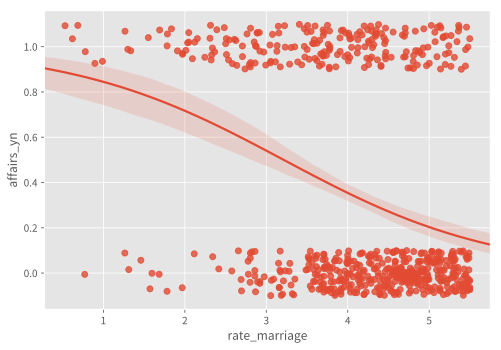

In [20]:
df = df_fair_2.sample(frac=0.1, random_state=20190429)
sns.regplot(data=df, x='rate_marriage', y='affairs_yn',
            logistic=True,
            x_jitter=1/2, y_jitter=0.2/2)
# plt_savefig('logit_model.png')